In [1]:
import numpy as np
import scipy
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def loadLinks(path):
    d = {}
    with open(path) as f:
        for l in f:
            w = l.split()
            d[int(w[0])] = [int(i) for i in w[1:]]
    return d

In [3]:
data = np.loadtxt("./recodata/u.data", int)[:,:3]
links = nx.from_dict_of_lists(loadLinks("./recodata/u.links"),create_using=nx.DiGraph())
du, dv, _ = data.max(0)

In [4]:
def colFil(r, u, v, ite = 1, alpha = 0.001, eps = 1e-3, verbose = False):
    '''r matrice sparse de la forme rowInd colInd data
    u : rowLen(r) * n
    v : colLen(r) * m'''
    for i in range(ite):
        if i%(ite//10) == 0: 
            print("iter :", i)
            if verbose :
                print("u", u.mean(0))
                print("v", v.mean(0))
        for ui, vi, d in r:
            ui -= 1
            vi -= 1
            dist1 = d - u[ui].dot(v[vi])
            u[ui] += eps * 2 *(dist1 * v[vi] + alpha * u[ui])
            v[vi] += eps * 2 *(dist1 * u[ui] + alpha * v[vi])
            if verbose : print("u", u[ui])
            if verbose : print("v", v[vi])
        lossHisto.append(dist1*dist1)

In [5]:
u = np.random.rand(du, 10)
v = np.random.rand(dv, 10)
lossHisto = []
#colFil(data, u, v, 300)
colFil(data, u, v, 300)

iter : 0
iter : 30
iter : 60
iter : 90
iter : 120
iter : 150
iter : 180
iter : 210
iter : 240
iter : 270


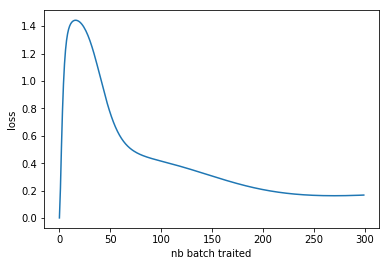

In [6]:
plt.plot(lossHisto)
plt.ylabel('loss')
plt.xlabel('nb batch traited')
plt.show()

In [7]:
r2 = u.dot(v.T)
i,j,d = data[50]
print(r2[i,j], d)

4.55431888536 4


Faire pareil que colFil mais avec une contrainte suplémentaire : minimiser les distance entre certain vecteur de U et une autre matrice Z avec les lien entre l'utilisateur i et j (potentiellement dirigé) t. q. (Ui-Zj)^2 -> 0 

In [8]:
def colFilRez(r, l, u, v, ite = 1, alpha = 0.001, beta = 0.1, eps = 1e-3, verbose = False):
    '''r matrice sparse de la forme rowInd colInd data
    u : rowLen(r) * n
    v : colLen(r) * m'''
    for i in range(ite):
        if i%(ite//10) == 0:
        #if True :
            print("iter :", i)
            if verbose :
                print("u", u.mean(0))
                print("v", v.mean(0))
        for ui, vi, d in r:
            ui -= 1
            vi -= 1
            dist1 = d - u[ui].dot(v[vi])
            v[vi] += eps * 2 *(dist1 * u[ui] + alpha * v[vi])
            if l.has_node(ui) and l.out_degree[ui] != 0:
                for zi in l.neighbors(ui):
                    zi -= 1
                    u[ui] += eps * 2 *(dist1 * v[vi] + alpha * u[ui] + beta * (u[zi] - u[ui]))
            else :
                u[ui] += eps * 2 *(dist1 * v[vi] + alpha * u[ui])
        lossHisto.append(dist1*dist1)

In [9]:
u = np.random.rand(du, 10)
v = np.random.rand(dv, 10)
lossHisto = []
colFilRez(data, links, u, v, 100)

iter : 0
iter : 10
iter : 20
iter : 30
iter : 40
iter : 50
iter : 60
iter : 70
iter : 80
iter : 90


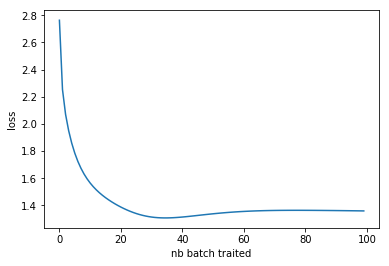

In [10]:
plt.plot(lossHisto)
plt.ylabel('loss')
plt.xlabel('nb batch traited')
plt.show()

In [11]:
def colFilRez2(r, l, u, v, ite = 1, alpha = 0.001, beta = 0.1, eps = 1e-3, verbose = False):
    '''r matrice sparse de la forme rowInd colInd data
    u : rowLen(r) * n
    v : colLen(r) * m'''
    for i in range(ite):
        if i%(ite//10) == 0:
        #if True :
            print("iter :", i)
            if verbose :
                print("u", u.mean(0))
                print("v", v.mean(0))
        for ui, vi, d in r:
            ui -= 1
            vi -= 1
            dist1 = d - u[ui].dot(v[vi])
            v[vi] += eps * 2 *(dist1 * u[ui] + alpha * v[vi])
            if l.has_node(ui) and l.out_degree[ui] != 0:
                for zi in l.neighbors(ui):
                    zi -= 1
                    u[ui] += eps * 2 *(dist1 * v[vi] + alpha * u[ui] + beta * (u[zi] - u[ui]))
                    u[zi] += eps * 2 *(alpha * u[zi] + beta * (u[zi] - u[ui]))
            else :
                u[ui] += eps * 2 *(dist1 * v[vi] + alpha * u[ui])
        lossHisto.append(dist1*dist1)

In [12]:
u = np.random.rand(du, 10)
v = np.random.rand(dv, 10)
lossHisto = []
colFilRez2(data, links, u, v, 100)
plt.plot(lossHisto)
plt.ylabel('loss')
plt.xlabel('nb batch traited')
plt.show()

iter : 0


/home/benlog/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in multiply
/home/benlog/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in add
/home/benlog/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/home/benlog/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract


iter : 10
iter : 20


KeyboardInterrupt: 

In [ ]:
def colFilRez3(r, l, u, v, z, ite = 1, alpha = 0.001, beta = 0.1, eps = 1e-3, verbose = False):
    '''r matrice sparse de la forme rowInd colInd data
    u : rowLen(r) * n
    v : colLen(r) * m'''
    for i in range(ite):
        if i%(ite//10) == 0:
        #if True :
            print("iter :", i)
            if verbose :
                print("u", u.mean(0))
                print("v", v.mean(0))
        for ui, vi, d in r:
            ui -= 1
            vi -= 1
            dist1 = d - u[ui].dot(v[vi])
            v[vi] += eps * 2 *(dist1 * u[ui] + alpha * v[vi])
            if l.has_node(ui) and l.out_degree[ui] != 0:
                for zi in l.neighbors(ui):
                    zi -= 1
                    u[ui] += eps * 2 *(dist1 * v[vi] + alpha * u[ui] + beta * (z[zi] - u[ui]))
                    z[zi] += eps * 2 *(alpha * z[zi] + beta * (z[zi] - u[ui]))
            else :
                u[ui] += eps * 2 *(dist1 * v[vi] + alpha * u[ui])
        lossHisto.append(dist1*dist1)

In [ ]:
u = np.random.rand(du, 10)
v = np.random.rand(dv, 10)
z = np.random.rand(dv, 10)
lossHisto = []
colFilRez3(data, links, u, v, z, 100)
plt.plot(lossHisto)
plt.ylabel('loss')
plt.xlabel('nb batch traited')
plt.show()